# Métodos de Aprendizaje no supervisado

In [28]:
import pandas as pd

df = pd.read_excel('../../res/tp4/acath.xlsx', sheet_name='acath')  # 3505 rows

df.head()

,sex,age,cad.dur,choleste,sigdz,tvdlm
0,0,73,132,268.0,1,1.0
1,0,68,85,120.0,1,1.0
2,0,54,45,NaN,1,0.0
3,1,58,86,245.0,0,0.0
4,1,56,7,269.0,0,0.0


In [29]:
negative = df[df.sigdz == 0]
positive = df[df.sigdz == 1]

print(f"Cantidad de filas negativas: {len(negative)}")
print(f"Cantidad de filas positivas: {len(positive)}")

# Se elige un subset de filas para igualar la proporción
positive = positive.sample(n=len(negative))

total = [negative, positive]
df = pd.concat(total)

Cantidad de filas negativas: 1170
Cantidad de filas positivas: 2334


In [30]:
df.head()

,sex,age,cad.dur,choleste,sigdz,tvdlm
3,1,58,86,245.0,0,0.0
4,1,56,7,269.0,0,0.0
11,0,35,44,257.0,0,0.0
12,1,69,10,NaN,0,0.0
20,1,52,30,240.0,0,0.0


In [31]:
import numpy as np

# Sanitize dataset
result_column = 'sigdz'
columns = ['sex', 'age', 'cad.dur', 'choleste', 'tvdlm']
numeric_columns = ['age', 'cad.dur', 'choleste']

# Replace numeric value for `sigdz` with logical value
# df.replace({result_column: {1: 'T', 0: 'F'}}, inplace=True)
# df.replace({'tvdlm': {1: 'T', 0: 'F'}}, inplace=True)
# df.replace({'sex': {1: 'F', 0: 'M'}}, inplace=True)

# Replace NaN occurrences with mean
for column in numeric_columns:
    df.replace({column: {np.nan: int(df[column].mean())}}, inplace=True)

df.head()

,sex,age,cad.dur,choleste,sigdz,tvdlm
3,1,58,86,245.0,0,0.0
4,1,56,7,269.0,0,0.0
11,0,35,44,257.0,0,0.0
12,1,69,10,227.0,0,0.0
20,1,52,30,240.0,0,0.0


## Regresión Logística

In [32]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

def train_model(data, fields, result_var, params=None):
    model = LogisticRegression()
    model.fit(data[fields], data[result_var])
    return model


model = train_model(train, numeric_columns, result_column)
print(f"sklearn Classes: {model.classes_}")
print(f"sklearn Coeficients: {model.coef_}")
print(f"sklearn Intercept b0: {model.intercept_}")

sklearn Classes: [0 1]
sklearn Coeficients: [[0.05533231 0.00039722 0.00688659]]
sklearn Intercept b0: [-4.43854734]


In [34]:
predicted = model.predict(test[numeric_columns])

Población completa


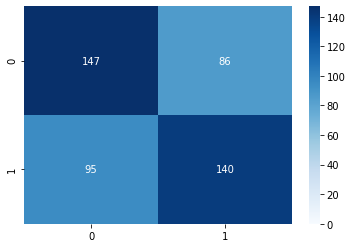

In [35]:
import seaborn as sns

def plot_confusion_matrix(data, result_var, predictions, title=None, ax=None):
    conf_mat = confusion_matrix(data[result_var], predictions)
    count_values = list(map(lambda x: sum(x), conf_mat))

    unique, counts = np.unique(np.array(data[result_var]), return_counts=True)
    count_labels = dict(zip(counts, unique))

    labels = []
    for value in count_values:
        labels.append(count_labels[value])

    if title is not None:
        print(title)

    if ax is None:
        sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, vmin=0)
    else:
        sns.heatmap(conf_mat, ax=ax, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, vmin=0)

plot_confusion_matrix(test, result_column, predicted, title='Población completa')

In [36]:
print(classification_report(test[result_column], predicted))

              precision    recall  f1-score   support

           0       0.61      0.63      0.62       233
           1       0.62      0.60      0.61       235

    accuracy                           0.61       468
   macro avg       0.61      0.61      0.61       468
weighted avg       0.61      0.61      0.61       468



#### Repetición del experimento usando librería statsmodels

In [37]:
import statsmodels.api as sm

def train_statsmodels_model(data, fields, result_var, params=None):
    model = sm.Logit(data[result_var], data[fields]).fit()
    print(model.summary())
    return model

statsmodel = train_statsmodels_model(train, numeric_columns, result_column)

Optimization terminated successfully.
         Current function value: 0.686727
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  sigdz   No. Observations:                 1872
Model:                          Logit   Df Residuals:                     1869
Method:                           MLE   Df Model:                            2
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                0.009261
Time:                        10:33:40   Log-Likelihood:                -1285.6
converged:                       True   LL-Null:                       -1297.6
Covariance Type:            nonrobust   LLR p-value:                 6.041e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0138      0.004      3.748      0.000       0.007       0.021
cad.dur        0.0017      0.

In [38]:
yhat = statsmodel.predict(test[numeric_columns])
predicted_2 = list(map(round, yhat))
print('Actual values', list(test[result_column].values))
print('statsmodels Predictions :', predicted_2)

Actual values [1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0

statsmodels Población completa


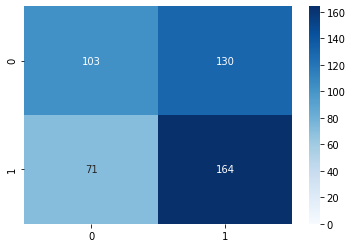

In [39]:
plot_confusion_matrix(test, result_column, predicted_2, title='statsmodels Población completa')

### Regresión Logística por género

In [10]:
men = df[df.sex == 0]
women = df[df.sex == 1]

train_men, test_men = train_test_split(men, test_size=0.2)
train_women, test_women = train_test_split(women, test_size=0.2)

print(f'Hombres: {len(men)}\nMujeres: {len(women)}')

Hombres: 1481
Mujeres: 859


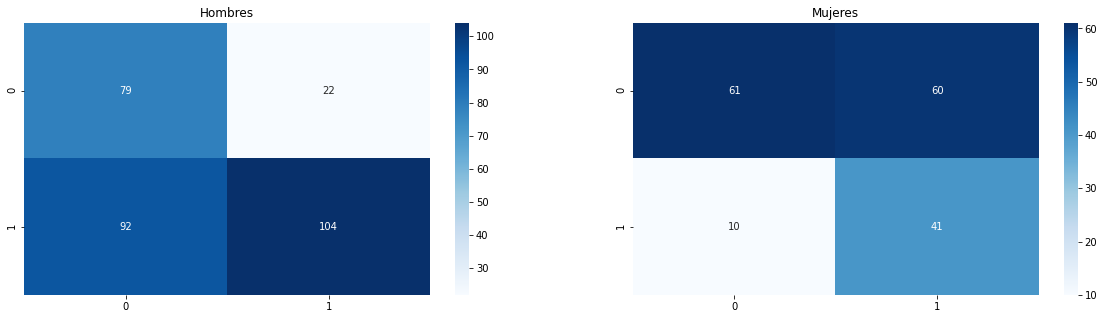

In [11]:
import matplotlib.pyplot as plt

model_men = train_model(train_men, numeric_columns, result_column)
model_women = train_model(train_women, numeric_columns, result_column)

predicted_men = model.predict(test_men[numeric_columns])
predicted_women = model.predict(test_women[numeric_columns])

tests = [test_men, test_women]
preds = [predicted_men, predicted_women]
titles = ['Hombres', 'Mujeres']

conf_mat_fig = plt.figure(figsize=(20,5))
i = 1
j = 2
k = 1
for test, pred, title in zip(tests, preds, titles):
    mat_ax = conf_mat_fig.add_subplot(i, j, k)
    mat_ax.set_title(title)
    plot_confusion_matrix(test, result_column, pred, ax=mat_ax)
    k += 1

In [12]:
for test, pred, title in zip(tests, preds, titles):
    print(title)
    print(classification_report(test[result_column], pred))

Hombres
              precision    recall  f1-score   support

           0       0.46      0.78      0.58       101
           1       0.83      0.53      0.65       196

    accuracy                           0.62       297
   macro avg       0.64      0.66      0.61       297
weighted avg       0.70      0.62      0.62       297

Mujeres
              precision    recall  f1-score   support

           0       0.86      0.50      0.64       121
           1       0.41      0.80      0.54        51

    accuracy                           0.59       172
   macro avg       0.63      0.65      0.59       172
weighted avg       0.72      0.59      0.61       172



#### Repetición del experimento con statsmodels

In [41]:
men = df[df.sex == 0]
women = df[df.sex == 1]

train_men, test_men = train_test_split(men, test_size=0.2)
train_women, test_women = train_test_split(women, test_size=0.2)
print(f'Hombres: {len(men)}\nMujeres: {len(women)}')

Hombres: 1466
Mujeres: 874


Optimization terminated successfully.
         Current function value: 0.625616
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  sigdz   No. Observations:                 1172
Model:                          Logit   Df Residuals:                     1169
Method:                           MLE   Df Model:                            2
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                 0.04261
Time:                        11:09:05   Log-Likelihood:                -733.22
converged:                       True   LL-Null:                       -765.85
Covariance Type:            nonrobust   LLR p-value:                 6.742e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0300      0.005      5.810      0.000       0.020       0.040
cad.dur        0.0027      0.

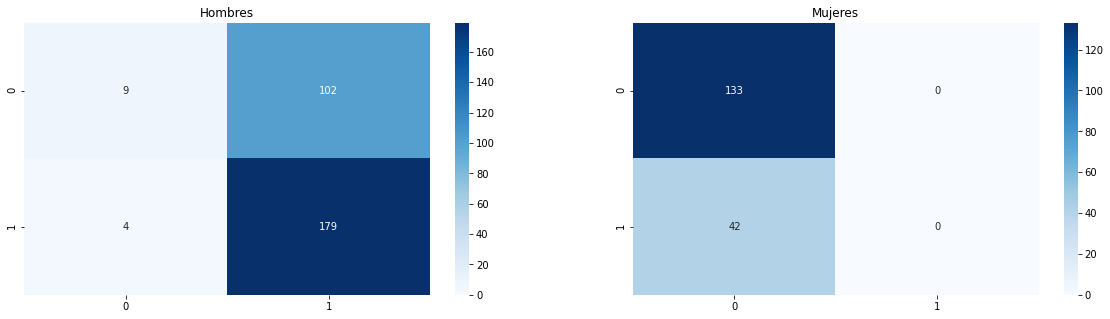

In [44]:
model_men_2 = train_statsmodels_model(train_men, numeric_columns, result_column)
model_women_2 = train_statsmodels_model(train_women, numeric_columns, result_column)

predicted_men = model.predict(test_men[numeric_columns])
predicted_women = model.predict(test_women[numeric_columns])

yhat_men = model_men_2.predict(test_men[numeric_columns])
predicted_men_2 = list(map(round, yhat_men))
yhat_women = model_women_2.predict(test_women[numeric_columns])
predicted_women_2 = list(map(round, yhat_women))

tests = [test_men, test_women]
preds = [predicted_men_2, predicted_women_2]
titles = ['Hombres', 'Mujeres']

conf_mat_fig = plt.figure(figsize=(20,5))
i = 1
j = 2
k = 1
for test, pred, title in zip(tests, preds, titles):
    mat_ax = conf_mat_fig.add_subplot(i, j, k)
    mat_ax.set_title(title)
    plot_confusion_matrix(test, result_column, pred, ax=mat_ax)
    k += 1

## Agrupamiento Jerárquico

In [96]:
train_hc, test_hc = train_test_split(df, test_size=0.05)

In [99]:
normalized_df = test_hc.copy()
for column in numeric_columns:
    column_min = min(normalized_df[column])
    column_max = max(normalized_df[column])
    #print(f"{column_min} {column_max}")
    normalized_df[column] = normalized_df[column].apply(lambda x: (x - column_min) / (column_max - column_min))

normalized_df.head()

,sex,age,cad.dur,choleste,sigdz,tvdlm
757,0,0.304348,0.085294,0.491597,0,0.0
546,0,0.543478,0.011765,0.521008,1,1.0
692,0,0.413043,0.200000,0.609244,1,0.0
3023,0,0.586957,0.355882,0.512605,1,0.0
429,1,0.891304,0.073529,0.735294,1,0.0


In [100]:
distance_matrix = np.zeros((len(normalized_df), len(normalized_df)))
num_norm_df = normalized_df[numeric_columns]
for i in range(len(normalized_df)):
    row_i = num_norm_df.iloc[i].to_numpy()
    for j in range(len(normalized_df)):
        if i >= j:
            continue
        row_j = num_norm_df.iloc[j].to_numpy()
        dist = np.linalg.norm(row_i - row_j)
        distance_matrix[i][j] = distance_matrix[j][i] = dist
    
    if i % 50 == 0:
        print(f"Processed {i} rows")

Processed 0 rows
Processed 50 rows
Processed 100 rows


In [101]:
print(distance_matrix)

[[0.         0.25190274 0.19701019 ... 0.49985434 0.191418   0.5421897 ]
 [0.25190274 0.         0.24542051 ... 0.28745667 0.22476822 0.35440335]
 [0.19701019 0.24542051 0.         ... 0.38896308 0.31230785 0.39233799]
 ...
 [0.49985434 0.28745667 0.38896308 ... 0.         0.50915563 0.14217071]
 [0.191418   0.22476822 0.31230785 ... 0.50915563 0.         0.55417667]
 [0.5421897  0.35440335 0.39233799 ... 0.14217071 0.55417667 0.        ]]


In [102]:
# [Nivel, Grupos]
# Grupos = [[p1, p2, p13], [p4], [p5, p9], ...] # array de sets

np.set_printoptions(linewidth=120)

def get_basic_distance_between_groups(group_1, group_2, operation):
    min_dist = None
    for point_1_index in group_1:
        for point_2_index in group_2:
            dist = distance_matrix[point_1_index][point_2_index]
            if min_dist is None or eval(f"{dist} {operation} {min_dist}"):
                min_dist = dist
    return min_dist

def get_average_distance_between_groups(group_1, group_2):
    suma = 0
    for point_1_index in group_1:
        for point_2_index in group_2:
            suma += distance_matrix[point_1_index][point_2_index]
    return suma / (len(group_1) * len(group_2))

def get_centroid_distance_between_groups(group_1_index, group_2_index, centroids):
    return np.linalg.norm(centroids[group_1_index]["centroid"] - centroids[group_2_index]["centroid"])
    
def get_distance_between_groups(groups, group_1_index, group_2_index, mode, centroids=None):
    group_1 = groups[group_1_index]
    group_2 = groups[group_2_index]
    if mode == "min":
        return get_basic_distance_between_groups(group_1, group_2, "<")
    elif mode == "max":
        return get_basic_distance_between_groups(group_1, group_2, ">")
    elif mode == "avg":
        return get_average_distance_between_groups(group_1, group_2)
    elif mode == "ctr":
        return get_centroid_distance_between_groups(group_1_index, group_2_index, centroids)
    
    raise Exception("Invalid distance mode")

def hierarchical_clustering(mode, cluster_count):
    levels = [[]]
    for i in range(len(normalized_df)):
        levels[0].append(set([i]))
    
    centroids = None # Array of centroid coordinates for each group
    if mode == "ctr":
        centroids = []
        for i in range(len(num_norm_df)):
            point = num_norm_df.iloc[i].to_numpy()
            centroids.append({"centroid": point, "points": np.array([point])})
    
    current_level = 0
    while len(levels[current_level]) > cluster_count:
        current_groups = levels[current_level]
        group_qty = len(levels[current_level])
        
        min_group_dist = None
        groups_to_merge = (None, None) # Indices
        
        for i in range(group_qty):
            for j in range(i + 1, group_qty):
                group_dist = get_distance_between_groups(current_groups, i, j, mode, centroids)
                if (min_group_dist is None) or (group_dist < min_group_dist):
                    groups_to_merge = (i, j)
                    min_group_dist = group_dist

        group_to_merge_1 = current_groups[groups_to_merge[0]]
        group_to_merge_2 = current_groups[groups_to_merge[1]]
        
        levels.append(current_groups.copy())
        new_group = set()
        new_group.update(group_to_merge_2)
        new_group.update(group_to_merge_1)
        levels[current_level + 1].append(new_group)
        levels[current_level + 1].pop(max(groups_to_merge))
        levels[current_level + 1].pop(min(groups_to_merge))
        
        if centroids is not None: # Push new group's centroid based on previous 2 centroids
            centroid_dict_1 = centroids.pop(max(groups_to_merge))
            centroid_dict_2 = centroids.pop(min(groups_to_merge))
            merged_points = np.concatenate((centroid_dict_1["points"], centroid_dict_2["points"]), axis=0)
            new_centroid_dict = {"centroid": merged_points.mean(axis=0), "points": merged_points}
            centroids.append(new_centroid_dict)

        current_level += 1
        
        if current_level % 25 == 0:
            print(f"Clusters merged: {current_level} - Distance between merged clusters was {min_group_dist}")
        
    return levels

In [115]:
from scipy import stats

def classify_clusters(clusters):
    if len(clusters) != 2:
        raise Exception("Invalid argument")
        
    cluster_1_rows = np.array(list(map(lambda x: test_hc[result_column].iloc[x], clusters[0])))
    cluster_1_mode = stats.mode(cluster_1_rows)[0][0]
    cluster_2_rows = np.array(list(map(lambda x: test_hc[result_column].iloc[x], clusters[1])))
    cluster_2_mode = stats.mode(cluster_2_rows)[0][0]
    
    return (cluster_1_mode, cluster_2_mode)

### Utilizando la Mínima como medida de similitud entre grupos

In [112]:
clusters_min_dist = hierarchical_clustering("min", 2)

Clusters merged: 25 - Distance between merged clusters was 0.03425320180045921
Clusters merged: 50 - Distance between merged clusters was 0.054038477534618684
Clusters merged: 75 - Distance between merged clusters was 0.08819126741773474
Clusters merged: 100 - Distance between merged clusters was 0.13934412659971998


In [113]:
print(clusters_min_dist[-1])

[{11}, {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116}]


In [238]:
min_cluster_classes = classify_clusters(clusters_min_dist[-1])

<AxesSubplot:>

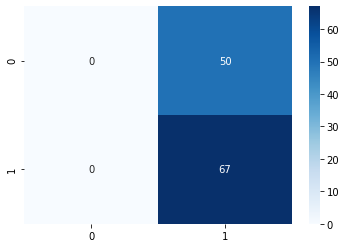

In [239]:
# Armado de matriz de confusión (filas: valores reales; columnas: valores predictivos)
confusion_matrix = { 0: {}, 1: {} }
columns = []
for key in confusion_matrix.keys():
    columns.append(key)
    confusion_matrix[key] = { 0: 0, 1: 0 }

for clase, cluster in zip(min_cluster_classes, clusters_min_dist[-1]):
    for index in cluster:
        real_class = normalized_df[result_column].iloc[index]
        confusion_matrix[real_class][clase] += 1

confusion_df = { key : list(confusion_matrix[key].values()) for key in confusion_matrix.keys() }
confusion_df = pd.DataFrame.from_dict(confusion_df, orient='index', columns=columns)

sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='g', vmin=0)

### Utilizando la Máxima como medida de similitud entre grupos

In [117]:
clusters_max_dist = hierarchical_clustering("max", 2)

Clusters merged: 25 - Distance between merged clusters was 0.0438743802733045
Clusters merged: 50 - Distance between merged clusters was 0.0848944879806963
Clusters merged: 75 - Distance between merged clusters was 0.15379008981523132
Clusters merged: 100 - Distance between merged clusters was 0.31389641378333144


In [118]:
print(clusters_max_dist[-1])

[{0, 1, 2, 8, 10, 14, 15, 16, 17, 19, 20, 22, 24, 25, 27, 29, 30, 33, 34, 37, 40, 41, 43, 44, 46, 47, 48, 51, 53, 54, 55, 61, 62, 63, 66, 67, 69, 71, 72, 73, 77, 78, 80, 81, 82, 85, 86, 88, 90, 91, 92, 93, 96, 97, 98, 102, 107, 108, 109, 110, 111, 112, 115}, {3, 4, 5, 6, 7, 9, 11, 12, 13, 18, 21, 23, 26, 28, 31, 32, 35, 36, 38, 39, 42, 45, 49, 50, 52, 56, 57, 58, 59, 60, 64, 65, 68, 70, 74, 75, 76, 79, 83, 84, 87, 89, 94, 95, 99, 100, 101, 103, 104, 105, 106, 113, 114, 116}]


In [236]:
max_cluster_classes = classify_clusters(clusters_max_dist[-1])

<AxesSubplot:>

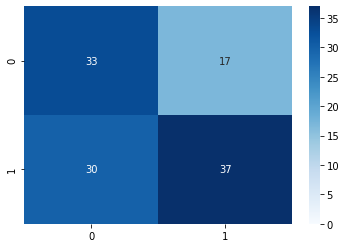

In [237]:
# Armado de matriz de confusión (filas: valores reales; columnas: valores predictivos)
confusion_matrix = { 0: {}, 1: {} }
columns = []
for key in confusion_matrix.keys():
    columns.append(key)
    confusion_matrix[key] = { 0: 0, 1: 0 }

for clase, cluster in zip(max_cluster_classes, clusters_max_dist[-1]):
    for index in cluster:
        real_class = normalized_df[result_column].iloc[index]
        confusion_matrix[real_class][clase] += 1

confusion_df = { key : list(confusion_matrix[key].values()) for key in confusion_matrix.keys() }
confusion_df = pd.DataFrame.from_dict(confusion_df, orient='index', columns=columns)

sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='g', vmin=0)

### Utilizando el Promedio como medida de similitud entre grupos

In [232]:
clusters_avg_dist = hierarchical_clustering("avg", 2)

Clusters merged: 25 - Distance between merged clusters was 0.042178130671802254
Clusters merged: 50 - Distance between merged clusters was 0.0777556228188955
Clusters merged: 75 - Distance between merged clusters was 0.1289830004001549
Clusters merged: 100 - Distance between merged clusters was 0.2350605637776278


In [233]:
print(clusters_avg_dist[-1])

[{89, 100, 6, 87, 105, 11, 60, 95}, {0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 90, 91, 92, 93, 94, 96, 97, 98, 99, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116}]


In [234]:
avg_cluster_classes = classify_clusters(clusters_avg_dist[-1])

<AxesSubplot:>

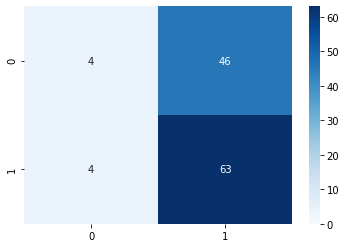

In [235]:
# Armado de matriz de confusión (filas: valores reales; columnas: valores predictivos)
confusion_matrix = { 0: {}, 1: {} }
columns = []
for key in confusion_matrix.keys():
    columns.append(key)
    confusion_matrix[key] = { 0: 0, 1: 0 }

for clase, cluster in zip(avg_cluster_classes, clusters_avg_dist[-1]):
    for index in cluster:
        real_class = normalized_df[result_column].iloc[index]
        confusion_matrix[real_class][clase] += 1

confusion_df = { key : list(confusion_matrix[key].values()) for key in confusion_matrix.keys() }
confusion_df = pd.DataFrame.from_dict(confusion_df, orient='index', columns=columns)

sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='g', vmin=0)

### Utilizando el Centroide como medida de similitud entre grupos

In [124]:
clusters_ctr_dist = hierarchical_clustering("ctr", 2)

Clusters merged: 25 - Distance between merged clusters was 0.04043036446287498
Clusters merged: 50 - Distance between merged clusters was 0.07337362266267401
Clusters merged: 75 - Distance between merged clusters was 0.12445459061340196
Clusters merged: 100 - Distance between merged clusters was 0.21145347138653714


In [125]:
print(clusters_ctr_dist[-1])

[{81}, {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116}]


In [229]:
ctr_cluster_classes = classify_clusters(clusters_ctr_dist[-1])

<AxesSubplot:>

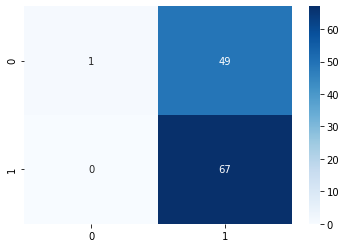

In [230]:
# Armado de matriz de confusión (filas: valores reales; columnas: valores predictivos)
confusion_matrix = { 0: {}, 1: {} }
columns = []
for key in confusion_matrix.keys():
    columns.append(key)
    confusion_matrix[key] = { 0: 0, 1: 0 }

for clase, cluster in zip(ctr_cluster_classes, clusters_ctr_dist[-1]):
    for index in cluster:
        real_class = normalized_df[result_column].iloc[index]
        confusion_matrix[real_class][clase] += 1

confusion_df = { key : list(confusion_matrix[key].values()) for key in confusion_matrix.keys() }
confusion_df = pd.DataFrame.from_dict(confusion_df, orient='index', columns=columns)

sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='g', vmin=0)

## K-medias

In [222]:
rng = np.random.default_rng()

# Update centroids based on points in the cluster
def update_centroids(data, classes):
    for clase in classes.values():
        if clase["changed"]:
            clase["centroid"] = np.array(list(map(lambda x: data.iloc[x], clase["indices"]))).mean(axis=0)
            clase["changed"] = False

def K_means(data, K=2):
    classes = {i: {"indices": set(), "centroid": np.zeros(len(numeric_columns)), "changed": True} for i in range(1, K+1)}
    
    # Set random clusters for every data point
    random_classes = rng.integers(1, K+1, size=len(data))
    for index, point_class in enumerate(random_classes):
        classes[point_class]["indices"].add(index)
    
    # Iterate until no changes are made in cluster
    while any(map(lambda x: x["changed"], classes.values())):
        update_centroids(data, classes)

        changes = []
        for clase, clase_value in classes.items():
            for point_index in clase_value["indices"]:
                point = data.iloc[point_index]
                
                # Get closest cluster based on distance to cluster centroids
                closest_class = (clase, np.linalg.norm(point - clase_value["centroid"]))
                for other_class, other_class_value in classes.items():
                    if clase == other_class:
                        continue

                    other_centroid = other_class_value["centroid"]
                    other_centroid_dist = np.linalg.norm(point - other_centroid)

                    if other_centroid_dist < closest_class[1]:
                        closest_class = (other_class, other_centroid_dist)

                if closest_class[0] != clase:
                    # Record belongs to another cluster, save for later update
                    changes.append({"old_cluster": clase, "new_cluster": closest_class[0], "point_index": point_index})

        # Update clusters
        for change in changes:
            old_cluster = classes[change["old_cluster"]]
            new_cluster = classes[change["new_cluster"]]
            old_cluster["indices"].remove(change["point_index"])
            new_cluster["indices"].add(change["point_index"])
            old_cluster["changed"] = new_cluster["changed"] = True
            
        print(f"Cluster changes processed: {len(changes)}")

    return classes

def classify_K_means(data, clusters):
    modes = []
    for cluster in clusters.values():
        cluster_rows = np.array(list(map(lambda x: data[result_column].iloc[x], cluster["indices"])))
        cluster_mode = stats.mode(cluster_rows)[0][0]
        modes.append(cluster_mode)
        
    return modes

def get_W(data, cluster):
    W = 0
    cluster_indices = list(cluster["indices"])
    for i in range(len(cluster_indices)):
        point_1 = data.iloc[cluster_indices[i]]
        for j in range(i+1, len(cluster_indices)):
            point_2 = data.iloc[cluster_indices[j]]
            W += sum(map(lambda x: (x[0] - x[1])**2, zip(point_1, point_2)))
    return W / len(cluster_indices)

def K_means_best(data, iterations=5, K=2):
    min_W_sum = None
    for i in range(iterations):
        sample, _ = train_test_split(data, test_size=0.3)
        K_means_clusters = K_means(sample, K)
        W_sum = 0
        
        # Calculate the sum of W of each cluster
        for current_K in range(1, K+1):
            W_sum += get_W(sample, K_means_clusters[current_K])
        
        # Get the best clusters based on minimum W sum
        if min_W_sum is None or W_sum < min_W_sum[1]:
            min_W_sum = (K_means_clusters, W_sum, sample)
            
        print(f"Finished iteration {i+1} - W sum: {W_sum}")
            
    return min_W_sum

def classify_K_means_best(data, sample, clusters):
    modes = []
    for cluster in clusters.values():
        # sample:
        # index | cad.dur   | age | ...
        # 1774  | 0.6       | 0.6 | ...
        # 3297  | 0.4       | 0.5 | ...
        #
        # data:
        # index | sex | cad.dur | ... | sigdz
        # 1774  | 1   | 0.6     | ... | 0
        # 3297  | 0.4 | 0.5    | ...  | 1
        #
        # Based on index in sample (1774), look for result column (sigdz) in entire data set - subsample does not have column sigdz and has less rows
        cluster_rows = np.array(list(map(lambda x: data[result_column].loc[sample.index[x]], cluster["indices"])))
        cluster_mode = stats.mode(cluster_rows)[0][0]
        modes.append(cluster_mode)
        
    return modes

In [138]:
# Use balanced dataset, without dividing into training and testing
complete_normalized_df = df.copy()
for column in numeric_columns:
    column_min = min(complete_normalized_df[column])
    column_max = max(complete_normalized_df[column])
    complete_normalized_df[column] = complete_normalized_df[column].apply(lambda x: (x - column_min) / (column_max - column_min))

complete_numeric_norm_df = complete_normalized_df[numeric_columns]

In [175]:
complete_normalized_df.head()

,sex,age,cad.dur,choleste,sigdz,tvdlm
3,1,0.630769,0.212871,0.416476,0,0.0
4,1,0.600000,0.017327,0.471396,0,0.0
11,0,0.276923,0.108911,0.443936,0,0.0
12,1,0.800000,0.024752,0.375286,0,0.0
20,1,0.538462,0.074257,0.405034,0,0.0


In [178]:
complete_normalized_df.iloc[3]

sex         1.000000
age         0.800000
cad.dur     0.024752
choleste    0.375286
sigdz       0.000000
tvdlm       0.000000
Name: 12, dtype: float64

In [140]:
K_means_clusters = K_means(complete_numeric_norm_df, 2)

Cluster changes processed: 1152
Cluster changes processed: 178
Cluster changes processed: 49
Cluster changes processed: 16
Cluster changes processed: 13
Cluster changes processed: 7
Cluster changes processed: 6
Cluster changes processed: 11
Cluster changes processed: 10
Cluster changes processed: 7
Cluster changes processed: 9
Cluster changes processed: 3
Cluster changes processed: 5
Cluster changes processed: 1
Cluster changes processed: 0


In [145]:
classify_K_means(complete_normalized_df, K_means_clusters)

[0, 1]

In [161]:
get_W(complete_numeric_norm_df, K_means_clusters[1])

30.17524605867601

In [162]:
get_W(complete_numeric_norm_df, K_means_clusters[2])

51.80124827108703

Run K-means algorithm multiple times and keep the data that gives the minimum W(C_k) sum

In [223]:
K_means_best_clusters, min_W_sum, K_means_best_sample = K_means_best(complete_numeric_norm_df, 5, 2)

Cluster changes processed: 797
Cluster changes processed: 174
Cluster changes processed: 159
Cluster changes processed: 134
Cluster changes processed: 75
Cluster changes processed: 41
Cluster changes processed: 23
Cluster changes processed: 18
Cluster changes processed: 14
Cluster changes processed: 11
Cluster changes processed: 4
Cluster changes processed: 4
Cluster changes processed: 4
Cluster changes processed: 6
Cluster changes processed: 3
Cluster changes processed: 1
Cluster changes processed: 4
Cluster changes processed: 5
Cluster changes processed: 6
Cluster changes processed: 4
Cluster changes processed: 2
Cluster changes processed: 1
Cluster changes processed: 1
Cluster changes processed: 0
Finished iteration 1 - W sum: 56.918830215599264
Cluster changes processed: 808
Cluster changes processed: 121
Cluster changes processed: 48
Cluster changes processed: 22
Cluster changes processed: 14
Cluster changes processed: 19
Cluster changes processed: 15
Cluster changes processed: 7


In [224]:
K_means_best_classes = classify_K_means_best(complete_normalized_df, K_means_best_sample, K_means_best_clusters)

In [225]:
K_means_best_classes

[1, 0]

<AxesSubplot:>

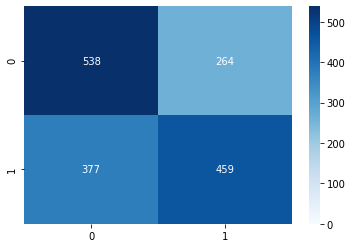

In [226]:
# Armado de matriz de confusión (filas: valores reales; columnas: valores predictivos)
confusion_matrix = { 0: {}, 1: {} }
columns = []
for key in confusion_matrix.keys():
    columns.append(key)
    confusion_matrix[key] = { 0: 0, 1: 0 }

for clase, cluster in zip(K_means_best_classes, K_means_best_clusters.values()):
    for index in cluster["indices"]:
        real_class = complete_normalized_df[result_column].loc[K_means_best_sample.index[index]]
        confusion_matrix[real_class][clase] += 1

confusion_df = { key : list(confusion_matrix[key].values()) for key in confusion_matrix.keys() }
confusion_df = pd.DataFrame.from_dict(confusion_df, orient='index', columns=columns)

sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='g', vmin=0)